In [2]:
# 라이브러리 불러오기
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# 데이터 로드
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

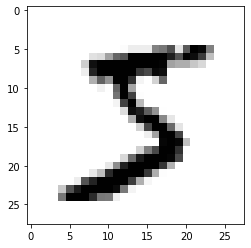

In [4]:
# MNIST 이미지 확인 및 데이터 전처리
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

In [6]:
print(train_images.shape, train_images.dtype)

(60000, 28, 28, 1) float32


In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# CNN 모델 생성
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

In [10]:
# 훈련
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
hist = model.fit(train_images, train_labels, 
                 epochs=10, batch_size=64,
                 validation_data=(test_images, test_labels),
                 verbose=1)

Epoch 1/10
938/938 [==============================] - 27s 27ms/step - loss: 0.1762 - accuracy: 0.9462 - val_loss: 0.0466 - val_accuracy: 0.9854
Epoch 2/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 3/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 4/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0303 - val_accuracy: 0.9910
Epoch 5/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0270 - val_accuracy: 0.9907
Epoch 6/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0248 - val_accuracy: 0.9920
Epoch 7/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0303 - val_accuracy:

In [12]:
# 테스트 결과
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9901
test_acc =  0.9901000261306763
